<h1 style="text-align:center; font-weight: bold; font-size: 40px;"> Team18 PyDIVAs Additional Questions  </h1>


### 

In [39]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df_subject_info = pd.read_csv("/Users/vidhy/Desktop/Numpy NinjaData Scientist/Python/Hackathon/subject-info.csv")
df_test_measure = pd.read_csv("/Users/vidhy/Desktop/Numpy NinjaData Scientist/Python/Hackathon/test_measure.csv")


In [7]:
# Creating Dataframe for subject-info
#df_subject_info = pd.read_csv("subject-info.csv")

# Creating Dataframe for test_measure
#df_test_measure = pd.read_csv("test_measure.csv")

# Creating Merged Dataframe
merged_df = pd.merge(df_subject_info, df_test_measure, on=['ID_test', 'ID'], how='inner')
merged_df.to_csv("merged_data.csv", index=False)

<h1 style="text-align:center;"> 1. Demographic Insights </h1>

#### Questions covered:  13 

### 

### 1. What is the most common age among the athletes?

In [54]:
most_common_age = merged_df['Age'].mode()[0]
print(f"\033[1mThe most common age is:\033[0m {most_common_age}")

The most common age is: 16.1


### 2. What is the average height and weight of the athletes?

In [56]:
average_height_weight = df_subject_info[['Height', 'Weight']].mean()
min_height = df_subject_info['Height'].min()
max_height = df_subject_info['Height'].max()

# Print with formatting
print(f"\033[1mAverage Height:\033[0m {average_height_weight['Height']:.2f} cm")
print(f"\033[1mAverage Weight:\033[0m {average_height_weight['Weight']:.2f} kg")

Average Height: 174.91 cm
Average Weight: 73.38 kg


### 3. What percentage of athletes are under 25 years of age?

In [58]:
percentage_under_25 = (df_subject_info['Age'] < 25).mean() * 100
print(f"\033[1mPercentage of athletes under 25 years of age:\033[0m {percentage_under_25:.2f}%")

Percentage of athletes under 25 years of age: 40.73%


### 4. How does VO2 max vary across different height categories?

VO2 max by height category:

Height Category  Average VO2 Max
        140-154            28.92
        155-164            30.25
        165-174            31.90
        175-184            32.28
        185-199            32.31


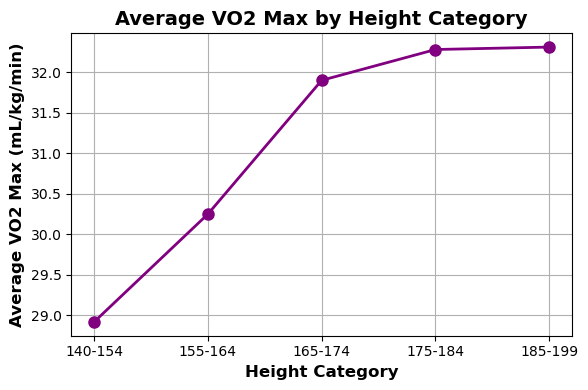

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already created and contains 'VO2_max' and 'Height'

# Define height categories (you can adjust these bins as needed)
height_bins = [140, 155, 165, 175, 185, 200]
height_labels = ['140-154', '155-164', '165-174', '175-184', '185-199']
merged_df['Height Category'] = pd.cut(merged_df['Height'], bins=height_bins, labels=height_labels, right=False)

# Calculate average VO2 max for each height category
vo2_by_height = merged_df.groupby('Height Category', observed=True)['VO2_max'].mean()

# Convert to DataFrame and clean output
vo2_by_height_df = vo2_by_height.reset_index()
vo2_by_height_df.columns = ['Height Category', 'Average VO2 Max']
vo2_by_height_df['Average VO2 Max'] = vo2_by_height_df['Average VO2 Max'].round(2)

# Print bold heading
print("\033[1mVO2 max by height category:\033[0m\n")
print(vo2_by_height_df.to_string(index=False))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(
    vo2_by_height_df['Height Category'],
    vo2_by_height_df['Average VO2 Max'],
    marker='o', color='purple', linestyle='-', linewidth=2, markersize=8
)
plt.title('Average VO2 Max by Height Category', fontsize=14, fontweight='bold')
plt.xlabel('Height Category', fontsize=12, fontweight='bold')
plt.ylabel('Average VO2 Max (mL/kg/min)', fontsize=12, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


### 5. What is the difference in average VCO2 between males and females?

Difference in average VCO2 between males and females: -763.05

***Interpretation (Negative Value): 
The negative value indicates that females have a lower average VCO2 than males. 
This could suggest a lower metabolic response or less CO2 production during exercise for females.


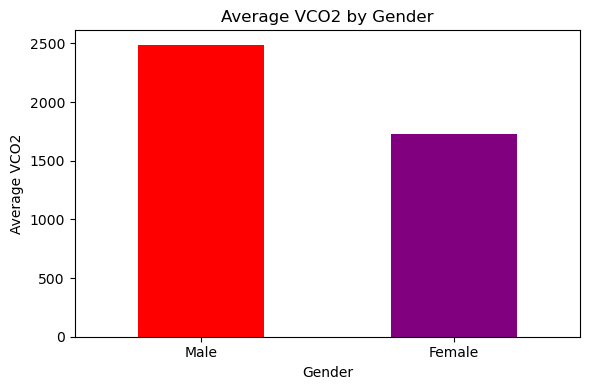

In [68]:
import matplotlib.pyplot as plt

average_vco2_by_gender = merged_df.groupby('Sex')['VCO2'].mean()
vco2_diff = average_vco2_by_gender.diff().iloc[-1]
print(f"\033[1mDifference in average VCO2 between males and females:\033[0m {vco2_diff:.2f}\n")

if vco2_diff < 0:
    print(f"\033[1m***Interpretation (Negative Value):\033[0m \nThe negative value indicates that females have a lower average VCO2 than males. \nThis could suggest a lower metabolic response or less CO2 production during exercise for females.")
else:
    print(f"\033[1m***Interpretation (Positive Value):\033[0m \nThe positive value indicates that males have a higher average VCO2 than females. \nThis might suggest a higher metabolic response or greater CO2 production during exercise for males.")

average_vco2_by_gender = average_vco2_by_gender.rename({0: 'Male', 1: 'Female'})

plt.figure(figsize=(6, 4))
average_vco2_by_gender.plot(kind='bar', color=['red', 'purple'])
plt.title('Average VCO2 by Gender')
plt.xlabel('Gender')
plt.ylabel('Average VCO2')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.tight_layout()
plt.show()

### 6. What is the average BMI across all athletes?

In [71]:
merged_df['BMI'] = merged_df['Weight'] / (merged_df['Height'] / 100) ** 2
average_bmi = merged_df['BMI'].mean()
print(f"\033[1mThe average BMI of athletes is:\033[0m {average_bmi:.2f}")

The average BMI of athletes is: 23.70


### 7. What is the gender distribution of athletes?

Gender distribution (%):
Sex
Male      87.213069
Female    12.786931


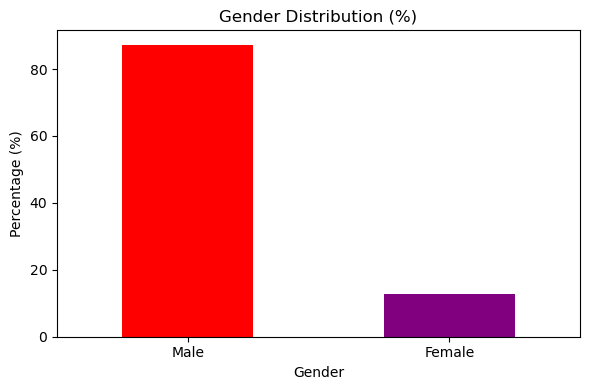

In [74]:
gender_distribution = merged_df['Sex'].value_counts(normalize=True) * 100
gender_distribution = gender_distribution.rename({0: 'Male', 1: 'Female'})
print(f"\033[1mGender distribution (%):\033[0m")
print(gender_distribution.to_string(index=True))

plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='bar', color=['red', 'purple'])
plt.title('Gender Distribution (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 8. How many athletes fall into different BMI categories (underweight, normal, overweight)

Athlete BMI Distribution:
BMI_category
Normal         393645
Overweight     146508
Underweight     16966
Obese           12508


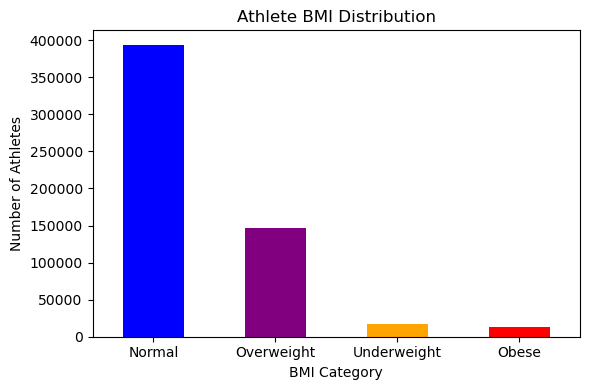

In [77]:
bins = [0, 18.5, 24.9, 29.9, 40]  # BMI ranges
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
merged_df['BMI_category'] = pd.cut(merged_df['BMI'], bins=bins, labels=labels)
bmi_category_count = merged_df['BMI_category'].value_counts()
print(f"\033[1mAthlete BMI Distribution:\033[0m")
print(bmi_category_count.to_string(index=True))

plt.figure(figsize=(6, 4))
bmi_category_count.plot(kind='bar', color=['blue', 'purple', 'orange', 'red'])
plt.title('Athlete BMI Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 9. Do taller athletes tend to have higher VO2?

Correlation between height and VO2 max: 0.28


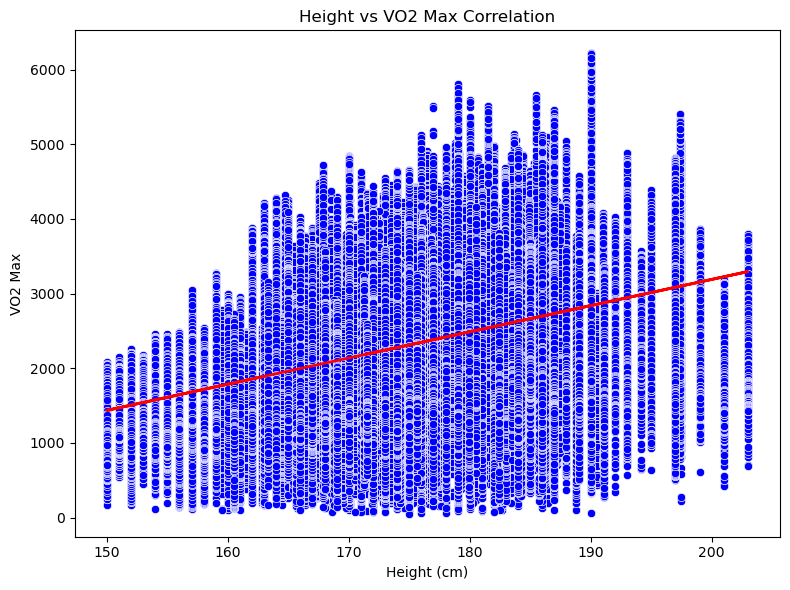

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

height_vo2_corr = merged_df[['Height', 'VO2']].corr().iloc[0, 1]
print(f"\033[1mCorrelation between height and VO2 max:\033[0m {height_vo2_corr:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Height', y='VO2', color='blue')
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Height'], merged_df['VO2'])
plt.plot(merged_df['Height'], slope * merged_df['Height'] + intercept, color='red', linewidth=2)
plt.title('Height vs VO2 Max Correlation')
plt.xlabel('Height (cm)')
plt.ylabel('VO2 Max')
plt.tight_layout()
plt.show()

### 10. What is the most common height range among athletes?

The most common height range is: (170, 180]


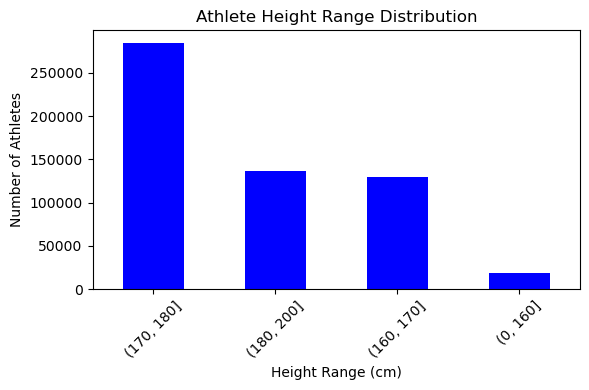

In [83]:
height_range = pd.cut(merged_df['Height'], bins=[0, 160, 170, 180, 200])  
most_common_height_range = height_range.mode()[0]
print(f"\033[1mThe most common height range is:\033[0m {most_common_height_range}")

height_range = pd.cut(merged_df['Height'], bins=[0, 160, 170, 180, 200])
height_range_count = height_range.value_counts()
plt.figure(figsize=(6, 4))
height_range_count.plot(kind='bar', color='blue')
plt.title('Athlete Height Range Distribution')
plt.xlabel('Height Range (cm)')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 11. Do athletes with similar BMI have similar test outcomes?

Average VO2 Max by BMI Category:

BMI Category  Average VO2 Max
 Underweight          1766.91
      Normal          2278.48
  Overweight          2452.37
       Obese          2514.05


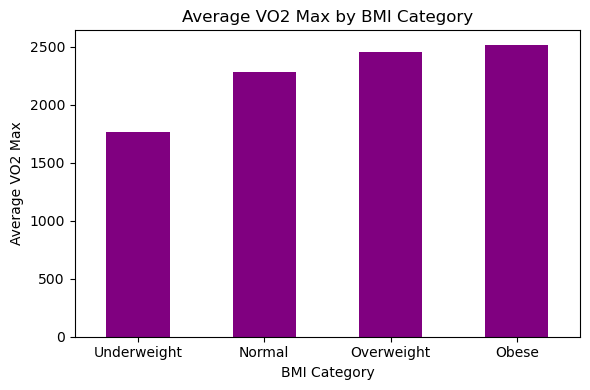

In [86]:
average_vo2_by_bmi_category = merged_df.groupby('BMI_category', observed=True)['VO2'].mean().round(2)
average_vo2_df = average_vo2_by_bmi_category.reset_index()
average_vo2_df.columns = ['BMI Category', 'Average VO2 Max']

print("\033[1mAverage VO2 Max by BMI Category:\033[0m\n")
print(average_vo2_df.to_string(index=False))

average_vo2_by_bmi_category = merged_df.groupby('BMI_category', observed=True)['VO2'].mean().round(2)
plt.figure(figsize=(6, 4))
average_vo2_by_bmi_category.plot(kind='bar', color='purple')
plt.title('Average VO2 Max by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average VO2 Max')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 12. What is the distribution of participants by age group and gender (male/female)?

        Age Age Group
91750  18.0     18-30
91751  18.0     18-30
91752  18.0     18-30
91753  18.0     18-30
91754  18.0     18-30


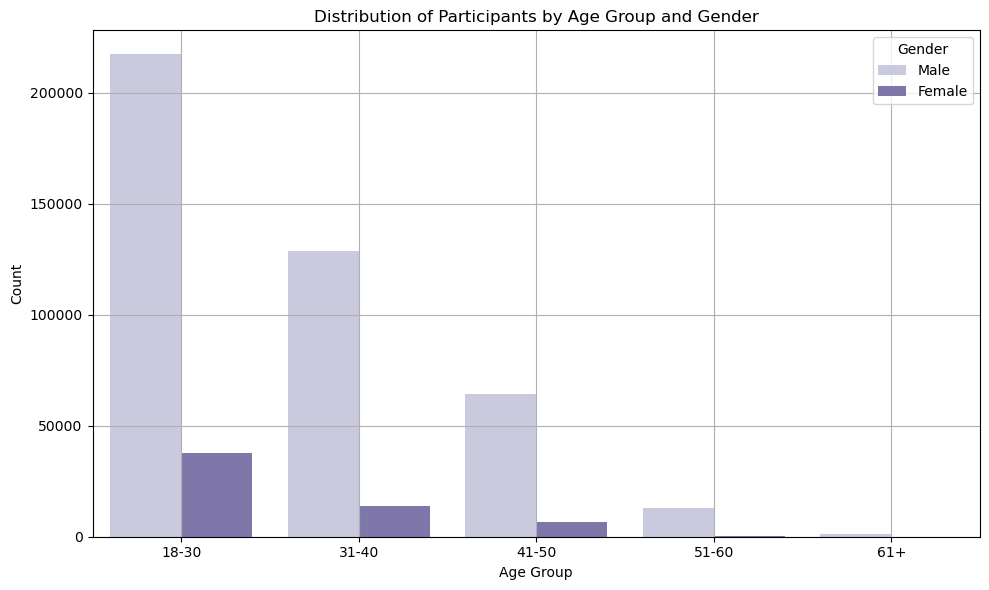

In [18]:
merged_df = merged_df[merged_df['Age'] >= 18]

age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61+']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels, right=False)
print(merged_df[['Age', 'Age Group']].head())

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Age Group', hue='Sex', palette='Purples')
plt.title('Distribution of Participants by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.grid(True)
plt.tight_layout()
plt.show()

### 13. Which age group reaches peak HR faster? Calculate average time to peak HR for each group

Age_Group
Child          759
Teen           333
Young Adult    771
Adult          968
Senior         564
dtype: int64


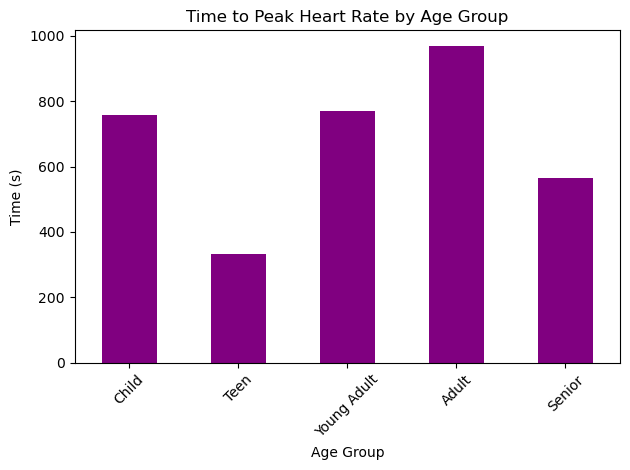

In [35]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppressing DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Creating Age Groups
bins = [0, 12, 19, 35, 50, 65]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)

# Correcting the time_to_peak function
def time_to_peak(df):
    if df.empty or 'HR' not in df.columns:
        return np.nan
    return df.loc[df['HR'].idxmax(), 'time']

# Applying the function to find time to peak HR for each age group
peak_times_by_age = merged_df.groupby('Age_Group', observed=False).apply(time_to_peak)
print(peak_times_by_age)

# Plotting the results with purple color
peak_times_by_age.plot(kind='bar', color='purple', title='Time to Peak Heart Rate by Age Group')
plt.ylabel('Time (s)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1 style="text-align:center;"> 2. Cardiorespiratory Metrics</h1>

#### Questions covered:  11

### 

### 1. What is the average heart rate across all tests?

In [90]:
average_hr = merged_df['HR'].mean()
print(f"\033[1mAverage heart rate:\033[0m {average_hr:.2f} bpm")

Average heart rate: 147.01 bpm


### 2. What is the maximum recorded VO2?

In [93]:
max_vo2 = merged_df['VO2'].max()
print(f"\033[1mMaximum recorded VO2:\033[0m {max_vo2} mL/min\n")

Maximum recorded VO2: 6217.0 mL/min



### 3. What is the average VCO2 for participants over 40 years old?

In [96]:
avg_vco2_over_40 = merged_df[merged_df['Age'] > 40]['VCO2'].mean()
print(f"\033[1mAverage VCO2 for participants over 40:\033[0m {avg_vco2_over_40:.2f} mL/min\n")

Average VCO2 for participants over 40: 2302.60 mL/min



### 4. Which participant had the highest average pulmonary ventilation (VE)?

In [99]:
highest_ve = merged_df.groupby('ID')['VE'].mean().idxmax()
print(f"\033[1mParticipant with highest average VE:\033[0m {highest_ve}\n")

Participant with highest average VE: 753



### 5. How does HR change over time during a test? (example for 1 test)

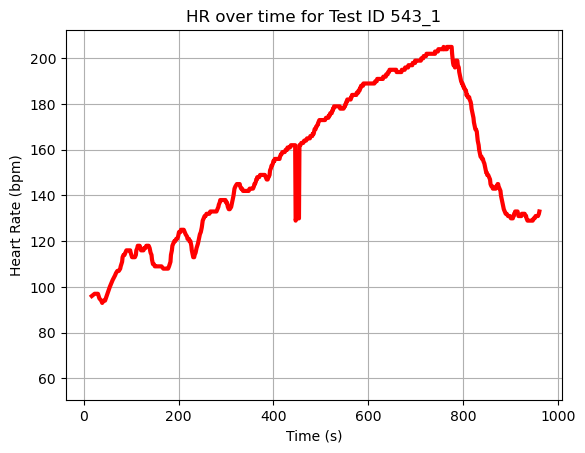

In [102]:
import matplotlib.pyplot as plt

test_id = merged_df['ID_test'].iloc[0]
test_df = merged_df[merged_df['ID_test'] == test_id]

plt.plot(test_df['time'], test_df['HR'], color='red', linewidth=3) 
plt.title(f"HR over time for Test ID {test_id}")
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (bpm)')
plt.grid()
plt.show()

### 6. Calculate the average respiratory rate (RR) during peak exercise (VO2 > 2500).

In [105]:
avg_rr_peak = merged_df[merged_df['VO2'] > 2500]['RR'].mean()
print(f"\033[1mAverage RR during peak exercise:\033[0m {avg_rr_peak:.2f} breaths/min")

Average RR during peak exercise: 42.11 breaths/min


### 7. Which gender has higher average VO2 max (VO2 normalized by weight)?

In [108]:
merged_df['VO2_max'] = merged_df['VO2'] / merged_df['Weight']
avg_vo2_max_by_gender = merged_df.groupby('Sex')['VO2_max'].mean()
avg_vo2_max_by_gender = avg_vo2_max_by_gender.rename({0: 'Male', 1: 'Female'})
avg_vo2_max_by_gender = avg_vo2_max_by_gender.round(2)

print(f"\033[1mAverage VO2 max (ml/kg/min) by gender:\033[0m")
for gender, vo2_max in avg_vo2_max_by_gender.items():
    print(f"{gender}: {vo2_max}")

Average VO2 max (ml/kg/min) by gender:
Male: 32.62
Female: 27.21


### 8. How does VCO2 vary with VE (Pulmonary Ventilation)? Plot a scatter plot.

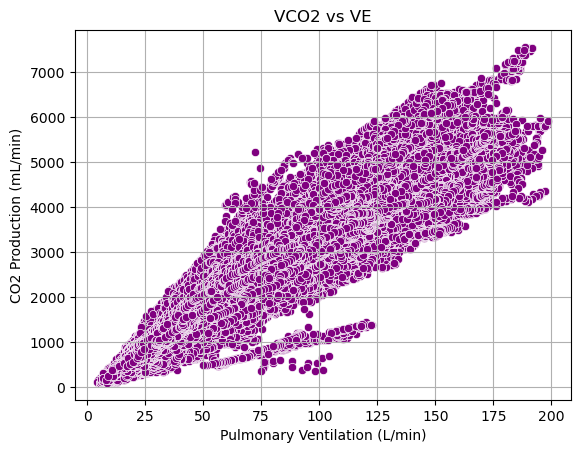

In [111]:
import seaborn as sns

sns.scatterplot(x='VE', y='VCO2', data=merged_df, color='purple')
plt.title('VCO2 vs VE')
plt.xlabel('Pulmonary Ventilation (L/min)')
plt.ylabel('CO2 Production (mL/min)')
plt.grid()
plt.show()

### 9. What is the correlation between HR and VO2?

In [114]:
hr_vo2_corr = merged_df[['HR', 'VO2']].corr().iloc[0, 1]
print(f"\033[1mCorrelation between HR and VO2: {hr_vo2_corr:.2f}\033[0m")

Correlation between HR and VO2: 0.76


### 10. What is the trend of VE over time for a specific athlete test?

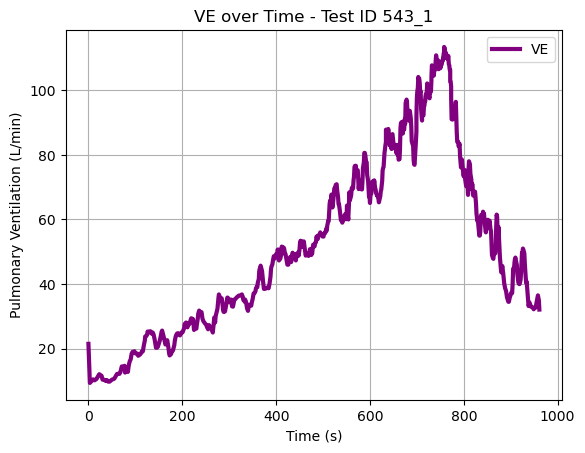

In [117]:
sample_test = merged_df['ID_test'].iloc[1]
sample_df = merged_df[merged_df['ID_test'] == sample_test]

plt.plot(sample_df['time'], sample_df['VE'], label='VE', color = 'purple', linewidth=3)
plt.title(f"VE over Time - Test ID {sample_test}")
plt.xlabel('Time (s)')
plt.ylabel('Pulmonary Ventilation (L/min)')
plt.grid()
plt.legend()
plt.show()

### 11. Calculate Average RR and VE per test

In [92]:
merged_df.groupby('ID_test')[['RR', 'VE']].mean()

,RR,VE
ID_test,,
100_1,36.380068,62.447804
101_1,30.357895,70.098105
102_1,28.568627,82.090196
103_1,42.197133,86.480357
104_1,31.292769,64.996649
...,...,...
98_1,31.148084,66.309913
99_1,37.689594,58.988889
99_47,37.782705,48.262971


<h1 style="text-align:center;"> 3. Computed Health Metrics </h1>

#### Questions covered:  10

### 

### 1. Calculate BMI and display participants with BMI > 25 (overweight or obese)

In [131]:
# Calculate BMI
merged_df['BMI'] = merged_df['Weight'] / ((merged_df['Height'] / 100) ** 2)

# Filter participants with BMI > 25
overweight_df = merged_df[merged_df['BMI'] > 25]

# Drop duplicates and reset index
overweight_clean = overweight_df[['ID', 'Age', 'Sex', 'Weight', 'Height', 'BMI']].drop_duplicates().reset_index(drop=True)

# Show only top 10 results
print("\033[1mParticipants with BMI over 25 (Top 10 shown):\033[0m\n")
print(overweight_clean.head(10).to_string(index=False))


Participants with BMI over 25 (Top 10 shown):

 ID  Age  Sex  Weight  Height       BMI
134 14.7    0    76.0   173.0 25.393431
588 14.9    0    83.0   182.0 25.057360
 40 15.0    0    77.0   165.0 28.282828
590 15.6    0    88.7   178.0 27.995203
313 15.9    1    68.0   158.0 27.239224
 14 16.4    0    86.5   170.0 29.930796
836 16.4    0    72.0   167.0 25.816630
820 16.8    1    67.0   160.6 25.976685
637 17.0    0    97.0   186.0 28.037923
223 17.2    0    81.0   178.0 25.564954


### 2. Calculate BSA using DuBois formula

In [136]:
merged_df['BSA'] = np.sqrt((merged_df['Weight'] * merged_df['Height']) / 3600)
bsa_df = merged_df[['ID', 'Weight', 'Height', 'BSA']].drop_duplicates().reset_index(drop=True)
print("\033[1mBody Surface Area (BSA) Calculated (Top 10 shown):\033[0m\n")
print(bsa_df.head(10).to_string(index=False))

Body Surface Area (BSA) Calculated (Top 10 shown):

 ID  Weight  Height      BSA
543    48.8   163.0 1.486457
 11    41.0   150.0 1.307032
829    46.0   160.0 1.429841
284    71.0   190.0 1.935774
341    53.8   169.7 1.592505
341    53.4   171.0 1.592639
343    46.0   160.0 1.429841
330    50.0   168.9 1.531611
338    47.2   160.2 1.449276
339    49.7   160.1 1.486697


### 3. Calculate VO2 max in ml/kg/min

In [138]:
merged_df['VO2_max'] = merged_df['VO2'] / merged_df['Weight']

print("\033[1mVO2 Max (ml/kg/min) for Sample Records:\033[0m\n")
print(merged_df[['ID_test', 'VO2', 'Weight', 'VO2_max']].head().to_string(index=False))

VO2 Max (ml/kg/min) for Sample Records:

ID_test   VO2  Weight   VO2_max
  543_1 585.0    48.8 11.987705
  543_1 223.0    48.8  4.569672
  543_1 309.0    48.8  6.331967
  543_1 280.0    48.8  5.737705
  543_1 294.0    48.8  6.024590


### 4. Calculate Heart Rate Reserve (HRR = HRmax - HRrest)

Heart Rate Reserve (HRR) Table - Top 10:

 ID  Age  HR_max  HR_rest   HRR
543 10.8   209.2     58.0 151.2
 11 11.8   208.2     96.0 112.2
829 12.2   207.8    110.0  97.8
284 13.2   206.8     76.0 130.8
341 13.7   206.3     81.0 125.3
341 13.8   206.2     81.0 125.2
343 14.0   206.0     94.0 112.0
330 14.1   205.9     84.0 121.9
338 14.1   205.9    102.0 103.9
339 14.1   205.9     51.0 154.9


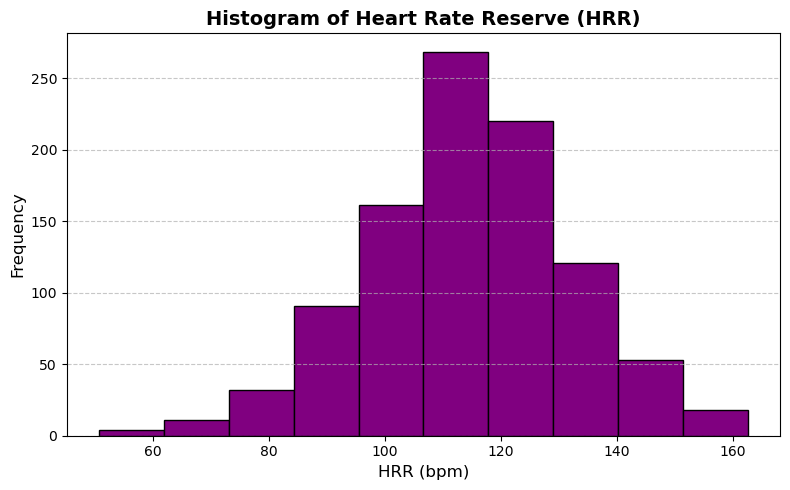

In [142]:
# Assuming HRrest is the minimum HR per athlete and HRmax is 220 - Age
hr_rest = merged_df.groupby('ID')['HR'].min().reset_index().rename(columns={'HR': 'HR_rest'})
merged_df = pd.merge(merged_df, hr_rest, on='ID', suffixes=('', '_rest'))

merged_df['HR_max'] = 220 - merged_df['Age']
merged_df['HRR'] = merged_df['HR_max'] - merged_df['HR_rest']

# Prepare a trimmed, rounded table
hrr_df = merged_df[['ID', 'Age', 'HR_max', 'HR_rest', 'HRR']].drop_duplicates().copy()
hrr_df[['HR_max', 'HR_rest', 'HRR']] = hrr_df[['HR_max', 'HR_rest', 'HRR']].round(1)

print("\033[1mHeart Rate Reserve (HRR) Table - Top 10:\033[0m\n")
print(hrr_df.head(10).to_string(index=False))

# Plot histogram of unique HRR values
plt.figure(figsize=(8, 5))
plt.hist(hrr_df['HRR'], bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Heart Rate Reserve (HRR)', fontsize=14, fontweight='bold')
plt.xlabel('HRR (bpm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5. Calculate Fitness Index

In [145]:
merged_df['Fitness_Index'] = (merged_df['Speed'] * 100) / merged_df['Weight'] * (50 / merged_df['Age'])
print("\033[1mFitness Index Table:\033[0m\n")
print(merged_df[['ID', 'Speed', 'Weight', 'Age', 'Fitness_Index']].head())

Fitness Index Table:

    ID  Speed  Weight   Age  Fitness_Index
0  543    0.0    48.8  10.8            0.0
1  543    0.0    48.8  10.8            0.0
2  543    0.0    48.8  10.8            0.0
3  543    0.0    48.8  10.8            0.0
4  543    0.0    48.8  10.8            0.0


### 6. Calculate R-R Interval (ms)

RR Interval Table:

  ID_test    HR  RR_interval_ms
0   543_1   NaN             NaN
1   543_1   NaN             NaN
2   543_1  58.0     1034.482759
3   543_1   NaN             NaN
4   543_1  96.0      625.000000


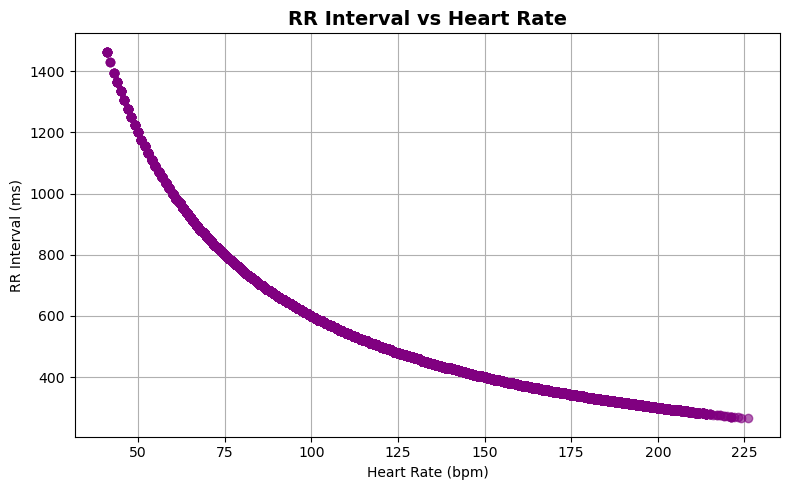

In [148]:
merged_df['RR_interval_ms'] = 60000 / merged_df['HR']
print("\033[1mRR Interval Table:\033[0m\n")
print(merged_df[['ID_test', 'HR', 'RR_interval_ms']].head())

plt.figure(figsize=(8, 5))
plt.plot(merged_df['HR'], merged_df['RR_interval_ms'], 'o', color='purple', alpha=0.6)
plt.title('RR Interval vs Heart Rate', fontsize=14, fontweight='bold')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('RR Interval (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Categorize BMI Levels

In [154]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

merged_df['BMI_Category'] = merged_df['BMI'].apply(bmi_category)
bmi_df = merged_df[['ID', 'BMI', 'BMI_Category']].drop_duplicates()

print("\033[1mBMI Classification Table (Top 10):\033[0m\n")
print(bmi_df.head(10).to_string(index=False))

BMI Classification Table (Top 10):

 ID       BMI BMI_Category
543 18.367270  Underweight
 11 18.222222  Underweight
829 17.968750  Underweight
284 19.667590       Normal
341 18.681795       Normal
341 18.262029  Underweight
343 17.968750  Underweight
330 17.527126  Underweight
338 18.391493  Underweight
339 19.389818       Normal


### 8. Calculate and categorize Heart Rate Zone (Excluding warm-up)

Heart Rate Zones Table:

 ID   HR HR_zone
543  NaN     NaN
543  NaN     NaN
543 58.0  Zone 1
543  NaN     NaN
543 96.0  Zone 1


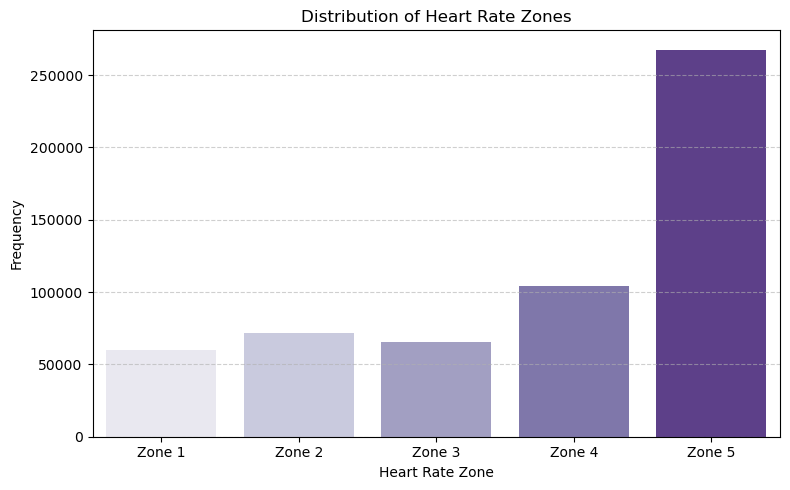

In [157]:
merged_df['HR_zone'] = pd.cut(
    merged_df['HR'],
    bins=[0, 100, 120, 135, 155, merged_df['HR'].max()],
    labels=["Zone 1", "Zone 2", "Zone 3", "Zone 4", "Zone 5"]
)

print("\033[1mHeart Rate Zones Table:\033[0m\n")
print(merged_df[['ID', 'HR', 'HR_zone']].head().to_string(index=False))

plt.figure(figsize=(8, 5))
sns.countplot(x='HR_zone', hue='HR_zone', data=merged_df, palette='Purples', legend=False)

plt.title('Distribution of Heart Rate Zones')
plt.xlabel('Heart Rate Zone')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 9. Calculate Tidal Volume (VE = RR * TV => TV = VE / RR)

In [160]:
merged_df['Tidal_Volume'] = merged_df['VE'] / merged_df['RR']

print("\033[1mTidal Volume (VE / RR) Table:\033[0m\n")
print(merged_df[['ID_test', 'VE', 'RR', 'Tidal_Volume']].head())

Tidal Volume (VE / RR) Table:

  ID_test    VE    RR  Tidal_Volume
0   543_1  21.5  13.0      1.653846
1   543_1   9.4  19.0      0.494737
2   543_1  10.5   9.0      1.166667
3   543_1  10.2  12.0      0.850000
4   543_1  10.6  13.0      0.815385


### 10. Standardize a Gaussian feature (e.g., HR) and plot

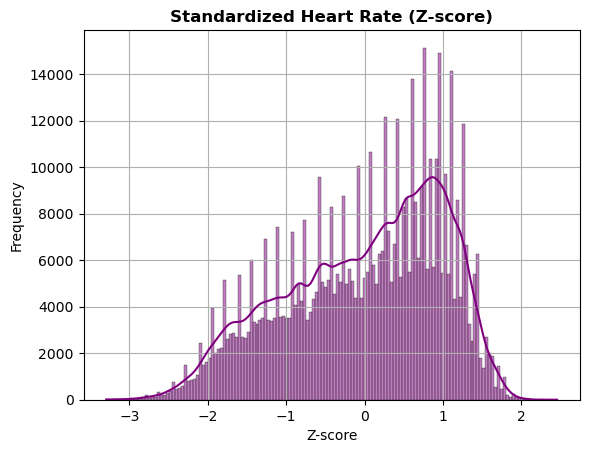

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

merged_df = merged_df.copy()
merged_df = merged_df[merged_df['HR'].notna()]
merged_df['HR_zscore'] = zscore(merged_df['HR'])

sns.histplot(merged_df['HR_zscore'], kde=True , color = 'purple')
plt.title('Standardized Heart Rate (Z-score)', weight='bold')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid()
plt.show()


<h1 style="text-align:center;"> 4. CardioRespiratory Insights </h1>

#### Questions covered:  10

###  

###  1: What is the highest recorded heart rate? Identify the participant with it.

In [167]:
max_hr = merged_df['HR'].max()
participant = merged_df[merged_df['HR'] == max_hr][['ID', 'ID_test']]
print("Highest HR:", max_hr)
print("Participant details:\n", participant)

Highest HR: 226.0
Participant details:
          ID ID_test
497319  619   619_1


###  2: What is the average HR for each treadmill speed? Plot a line graph.

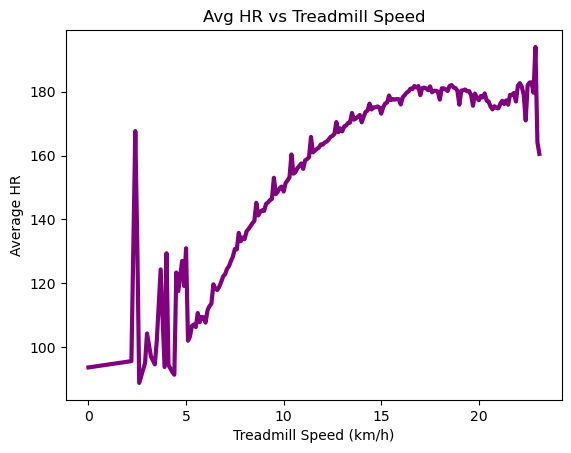

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_hr_speed = merged_df.groupby('Speed')['HR'].mean().reset_index()
sns.lineplot(data=avg_hr_speed, x='Speed', y='HR', color='purple', linewidth=3)
plt.title("Avg HR vs Treadmill Speed")
plt.ylabel("Average HR")
plt.xlabel("Treadmill Speed (km/h)")
plt.show()


### 3: What is the distribution of VO2 max across different age groups?

Age          0
VO2       4872
Weight       0


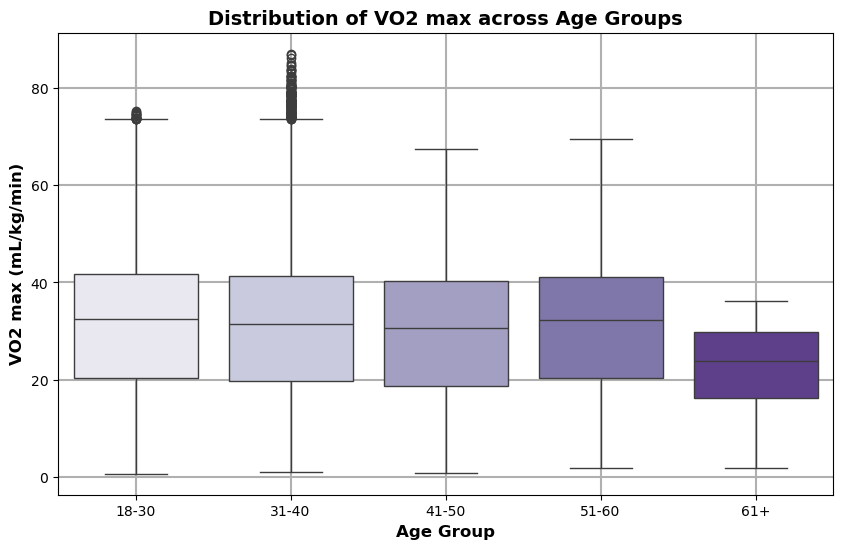

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the subject info and test measure data
info = pd.read_csv("/Users/vidhy/Desktop/Numpy NinjaData Scientist/Python/Hackathon/subject-info.csv")
measures = pd.read_csv("/Users/vidhy/Desktop/Numpy NinjaData Scientist/Python/Hackathon/test_measure.csv")


merged_df = pd.merge(info, measures, on=['ID_test', 'ID'], how='inner')
missing_data = merged_df[['Age', 'VO2', 'Weight']].isnull().sum()
print(missing_data.to_string())
merged_df = merged_df.dropna(subset=['Age', 'VO2', 'Weight'])
merged_df['VO2_max'] = merged_df['VO2'] / merged_df['Weight']

age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61+']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Age Group', y='VO2_max', hue='Age Group', palette="Purples", legend=False)
plt.title('Distribution of VO2 max across Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12, fontweight='bold')
plt.ylabel('VO2 max (mL/kg/min)', fontsize=12, fontweight='bold')
plt.grid(True, linewidth=1.5)
plt.legend([],[], frameon=False)  # Hide legend
plt.show()


### 4: Calculate RR interval and analyze variability.

In [176]:
merged_df['RR_interval_ms'] = 60000 / merged_df['HR']
print("\033[1mRR Interval Table:\033[0m")  # Bold title
print(merged_df[['ID', 'ID_test', 'time', 'RR_interval_ms']].head())

RR Interval Table:
    ID ID_test  time  RR_interval_ms
0  543   543_1     0             NaN
1  543   543_1     3             NaN
2  543   543_1    10     1034.482759
3  543   543_1    13             NaN
4  543   543_1    17      625.000000


###  5: Calculate average HRV using RMSSD method for each athlete.

In [181]:
import numpy as np

def rmssd(series):
    diff = np.diff(series)
    return np.sqrt(np.mean(diff**2)) if len(diff) > 1 else np.nan

hrv_data = merged_df.groupby('ID')['HR'].apply(rmssd).reset_index(name='HRV_RMSSD')
print(hrv_data.head(10))


   ID  HRV_RMSSD
0   1        NaN
1   2        NaN
2   3   1.367189
3   4   0.852386
4   5        NaN
5   6   1.061701
6   7   2.615827
7   8        NaN
8   9   2.364202
9  10        NaN


### 6: Visualize HR and VO2 over time for each test with trendline

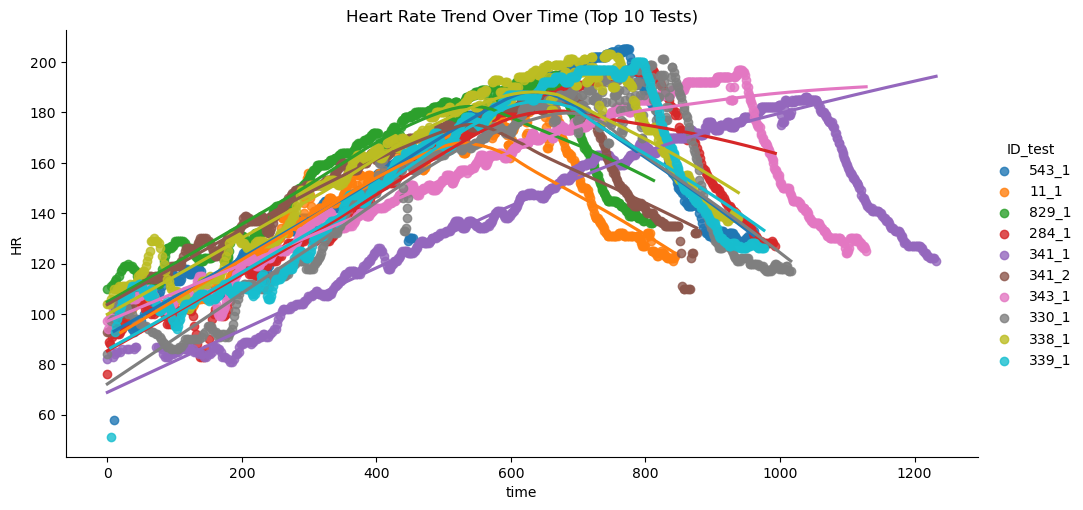

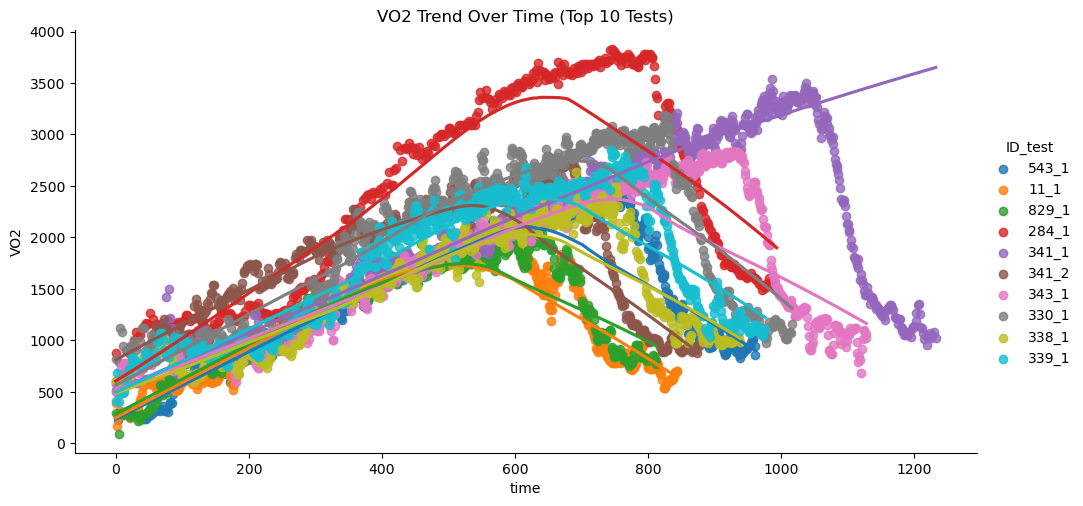

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter: Top 10 test IDs by order of appearance
top_ids = merged_df['ID_test'].drop_duplicates().head(10)
filtered_df = merged_df[merged_df['ID_test'].isin(top_ids)]

# Plot HR trend over time
sns.lmplot(data=filtered_df, x='time', y='HR', hue='ID_test', lowess=True, aspect=2)
plt.title("Heart Rate Trend Over Time (Top 10 Tests)")
plt.show()

# Plot VO2 trend over time
sns.lmplot(data=filtered_df, x='time', y='VO2', hue='ID_test', lowess=True, aspect=2)
plt.title("VO2 Trend Over Time (Top 10 Tests)")
plt.show()


### 7: Determine test with longest duration

In [38]:
duration_by_test = merged_df.groupby('ID_test')['time'].max().reset_index()
longest_test = duration_by_test.loc[duration_by_test['time'].idxmax()]
print(f"\033[1mTest with longest time: {longest_test['ID_test']} with duration {longest_test['time']} seconds\033[0m")

Test with longest time: 699_1 with duration 1712 seconds


### 8: Visualize HRR (Heart Rate Reserve) as density plot

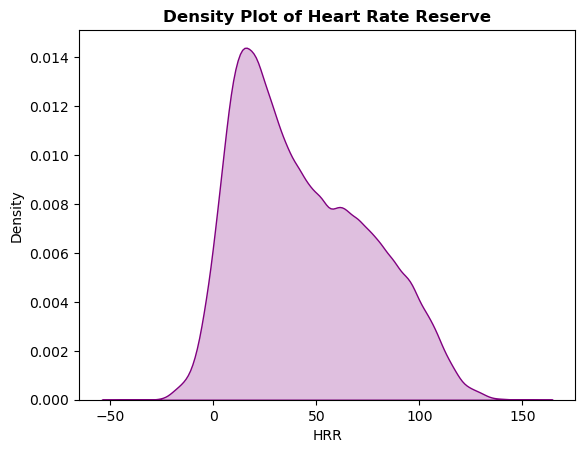

In [36]:
merged_df['HRmax'] = 220 - merged_df['Age']
merged_df['HRR'] = merged_df['HRmax'] - merged_df['HR']

sns.kdeplot(merged_df['HRR'].dropna(), fill=True, color = 'purple')
plt.title("Density Plot of Heart Rate Reserve", weight='bold')
plt.show()

### 9. Find VO₂ plateau – when VO₂ values stop increasing significantly

In [14]:
merged_df['VO2_diff'] = merged_df['VO2'].diff()
vo2_plateau = merged_df[merged_df['VO2_diff'].abs() < 20]
vo2_plateau

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,time,Speed,HR,VO2,VCO2,RR,VE,VO2_diff
4,10.8,48.8,163.0,39.0,20.7,1,543,543_1,17,0.0,96.0,294.0,283.0,13.0,10.6,14.0
6,10.8,48.8,163.0,39.0,20.7,1,543,543_1,28,0.0,97.0,302.0,296.0,13.0,11.6,-13.0
8,10.8,48.8,163.0,39.0,20.7,1,543,543_1,33,0.0,95.0,279.0,268.0,15.0,10.4,-3.0
10,10.8,48.8,163.0,39.0,20.7,1,543,543_1,39,0.0,93.0,257.0,241.0,21.0,10.3,8.0
12,10.8,48.8,163.0,39.0,20.7,1,543,543_1,45,0.0,94.0,233.0,219.0,24.0,9.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575079,63.0,83.5,171.5,48.0,22.2,0,296,296_1,739,5.0,109.0,1367.0,1628.0,25.0,56.5,-9.0
575080,63.0,83.5,171.5,48.0,22.2,0,296,296_1,741,5.0,108.0,1381.0,1633.0,25.0,57.1,14.0
575082,63.0,83.5,171.5,48.0,22.2,0,296,296_1,747,5.0,109.0,1346.0,1569.0,24.0,55.3,-8.0
575083,63.0,83.5,171.5,48.0,22.2,0,296,296_1,749,5.0,109.0,1346.0,1561.0,24.0,54.7,0.0


### 10.  Use rolling correlation to analyze the relationship between VO₂ and VCO₂

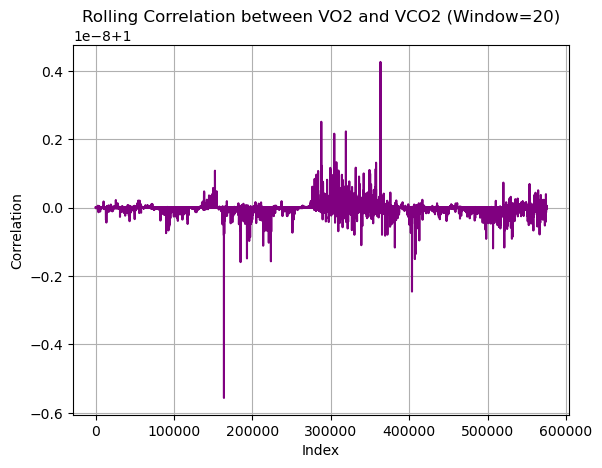

In [19]:
rolling_corr = merged_df[['VO2', 'VCO2']].rolling(window=20).corr().unstack().iloc[:,1]
rolling_corr.plot(color='purple')
plt.title("Rolling Correlation between VO2 and VCO2 (Window=20)")
plt.ylabel("Correlation")
plt.xlabel("Index")
plt.grid(True)
plt.show()


<h1 style="text-align:center;"> 5. Physical Performance Metrics  </h1>

#### Questions covered:  11

### 

### 1. How does heart rate (HR) vary during the different phases of exercise (Start, Middle, End)?

Average HR by Exercise Phase:
Phase
End       159.089192
Middle    162.756659
Start     113.922723
Name: HR, dtype: float64


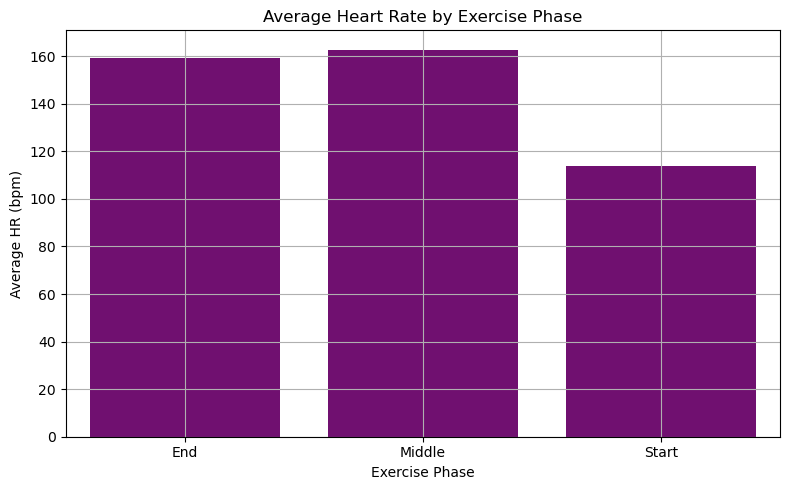

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Step 1: Define function to label phases based on time
def label_phase(df):
    df = df.sort_values('time')
    n = len(df)
    if n < 3:
        df['Phase'] = ['Unknown'] * n
    else:
        df['Phase'] = (
            ['Start'] * (n // 3) +
            ['Middle'] * (n // 3) +
            ['End'] * (n - 2 * (n // 3))
        )
    return df

# ✅ Step 2: Apply the function without 'include_group'
merged_df = (
    merged_df
    .groupby('ID', group_keys=False)
    .apply(label_phase)
    .reset_index(drop=True)
)

# Step 3: Group by Phase and calculate average HR
hr_by_phase = merged_df.groupby('Phase')['HR'].mean()

# Step 4: Print the average HR by phase
print("\033[1mAverage HR by Exercise Phase:\033[0m")
print(hr_by_phase)

# Step 5: Optional – Visualize the HR variation
plt.figure(figsize=(8, 5))
sns.barplot(x=hr_by_phase.index, y=hr_by_phase.values, color='Purple')
plt.title("Average Heart Rate by Exercise Phase")
plt.xlabel("Exercise Phase")
plt.ylabel("Average HR (bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. What is the relationship between Speed and HR during the exercise?

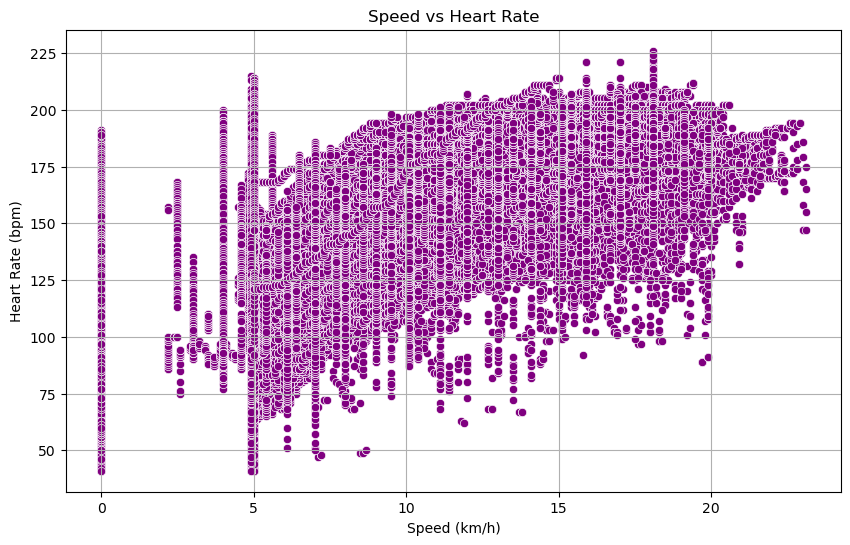

In [26]:
# Plotting the relationship between Speed and HR
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Speed', y='HR', color='purple')
plt.title("Speed vs Heart Rate")
plt.xlabel("Speed (km/h)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.show()

### 3. How does VO2 change with HR during exercise?

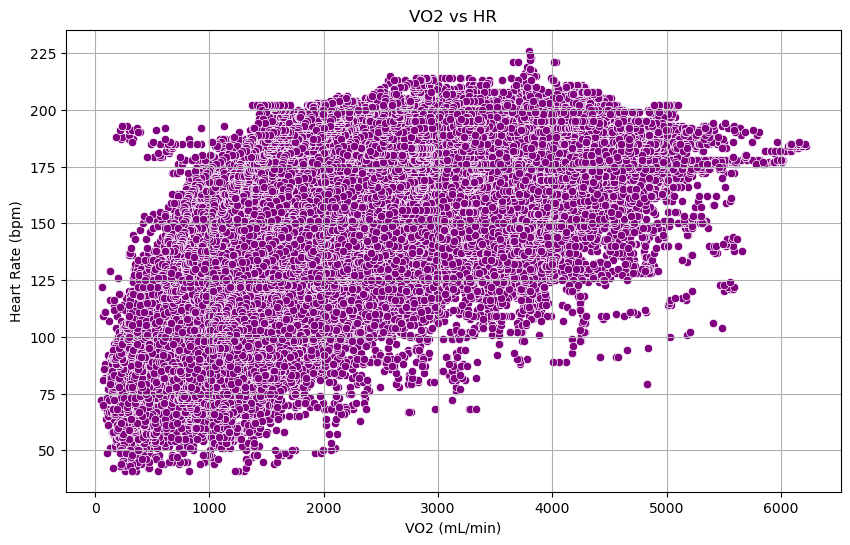

In [29]:
# Scatter plot to visualize the relationship between VO2 and HR
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='VO2', y='HR', color='purple')
plt.title("VO2 vs HR")
plt.xlabel("VO2 (mL/min)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.show()

### 4. What is the mean, median, and standard deviation of HR during the middle phase of exercise?

In [34]:
# Filter for 'Middle' phase
middle_phase_df = merged_df[merged_df['Phase'] == 'Middle']
mean_hr = middle_phase_df['HR'].mean()
median_hr = middle_phase_df['HR'].median()
std_hr = middle_phase_df['HR'].std()

print(f"\033[1mMean HR during Middle phase:\033[0m {mean_hr:.2f} bpm")
print(f"\033[1mMedian HR during Middle phase:\033[0m {median_hr:.2f} bpm")
print(f"\033[1mStandard Deviation of HR during Middle phase:\033[0m {std_hr:.2f} bpm")


Mean HR during Middle phase: 162.76 bpm
Median HR during Middle phase: 165.00 bpm
Standard Deviation of HR during Middle phase: 17.94 bpm


### 5. What is the average VO2 max for each height category?

In [49]:
def categorize_height(height):
    if height < 160:
        return 'Short'
    elif 160 <= height < 180:
        return 'Medium'
    else:
        return 'Tall'

merged_df['Height Category'] = merged_df['Height'].apply(categorize_height)
vo2_by_height_category = merged_df.groupby('Height Category')['VO2'].mean()
print("\033[1mAverage VO2 by Height Category:\033[0m")
print(vo2_by_height_category.round(2))


Average VO2 by Height Category:
Height Category
Medium    2241.35
Short     1472.45
Tall      2620.10
Name: VO2, dtype: float64


### 6. Is there a correlation between BMI and VO2 max?

In [56]:
merged_df['BMI'] = merged_df['Weight'] / (merged_df['Height'] / 100) ** 2  # Height is in cm, so divide by 100
bmi_vo2_corr = merged_df[['BMI', 'VO2']].corr().iloc[0, 1]
print(f"\033[1mCorrelation between BMI and VO2 Max: \033[0m{bmi_vo2_corr:.2f}")


Correlation between BMI and VO2 Max: 0.13


### 7. How does age impact HR during exercise?

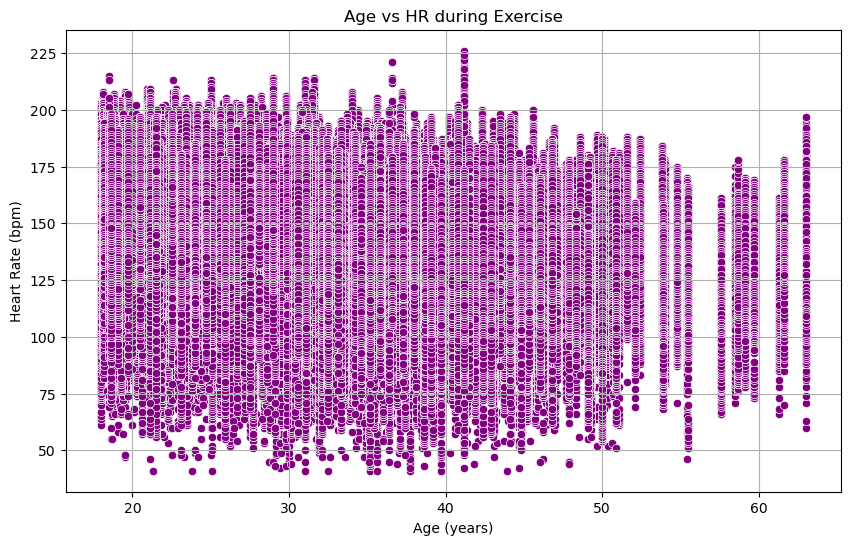

In [59]:
# Scatter plot to visualize the relationship between Age and HR
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Age', y='HR', color='purple')
plt.title("Age vs HR during Exercise")
plt.xlabel("Age (years)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.show()

### 8. What is the average HR during the 'Start' phase for different age groups?

In [80]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

start_phase_df = start_phase_df.rename(columns={None: 'HR'})
start_phase_df['HR'] = start_phase_df['HR'].astype(float)
avg_hr_by_age_group = start_phase_df.groupby('Age Group')['HR'].mean()
print("\033[1mAverage HR during Start Phase by Age Group:\033[0m")
print(avg_hr_by_age_group)

Average HR during Start Phase by Age Group:
Age Group
18-30    118.753098
31-40    110.419967
41-50    105.734127
51-60    103.179435
61+      102.981221
Name: HR, dtype: float64


### 9. How does the average HR vary across different exercise phases (Start, Middle, End)?

In [85]:
# Group by 'Phase' and calculate average HR
hr_by_phase = merged_df.groupby('Phase')['HR'].mean()
print("\033[1mAverage HR across Exercise Phases:\033[0m")
print(hr_by_phase)


Average HR across Exercise Phases:
Phase
End       159.089192
Middle    162.756659
Start     113.922723
Name: HR, dtype: float64


### 10. Is there a significant difference in HR between males and females during exercise?

In [88]:
# Group by 'Sex' and calculate average HR
hr_by_sex = merged_df.groupby('Sex')['HR'].mean()
print("\033[1mAverage HR by Sex:\033[0m")
print(hr_by_sex)

Average HR by Sex:
Sex
0    145.062612
1    147.277932
Name: HR, dtype: float64


### 11.Classify treadmill speed phases using clustering and visualize them

<Axes: xlabel='time', ylabel='Speed'>

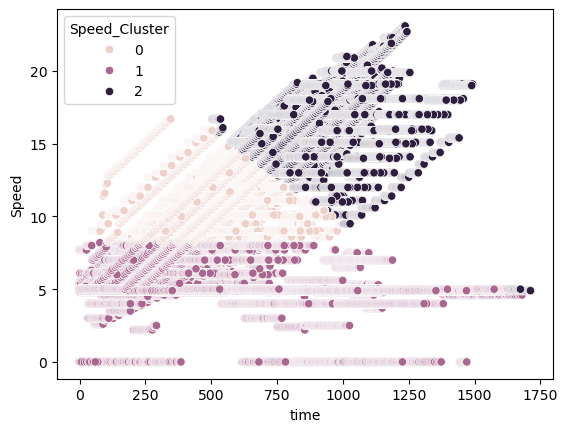

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
speed_data = merged_df[['Speed', 'time']]
scaled = StandardScaler().fit_transform(speed_data)
kmeans = KMeans(n_clusters=3).fit(scaled)
merged_df['Speed_Cluster'] = kmeans.labels_
sns.scatterplot(x='time', y='Speed', hue='Speed_Cluster', data=merged_df)